In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [32]:
H = 0.25
L = 1

alpha = 207 #Volume expansion coefficient of water @ 20 C
k = 0.6     #Thermal conductivity of water @ 20 C

#ReC = 1100.65 #Critical Rayleigh number for one free and one rigid boundary condition
ReC = 1708     #Critical Rayleigh number for two rigid body boundary condition
g = 9.81
D = 0.143E-6  #Thermal diffusivity of water
rho_i = 1000   #Density of water @ 20 C

L = 1
H = 0.001

nxy = 101
nt = 500

dxy = L/(nxy-1)

x = np.linspace(0,L,nxy)
y = np.linspace(0,H,nxy)

#Change to Kelivin?
To = 20
vo = 2.414*10**(-5) * 10**(247.8/(To + 273 - 140)) / rho_i  #initial kinematic viscosity of water
delT = (ReC*vo*1.43*10**(-7))/(alpha*g*H**3)
Ti = np.ones((nxy, nxy))*To
Ti[0,:] = 20 + delT

rho = np.ones((nxy,nxy), dtype=float)*rho_i
rho[0,:] = rho_i*(1-alpha*(Ti[0,:] - To))

v = np.ones((nxy,nxy))*2.414*10**(-5) * 10**(247.8/(Ti + 273 - 140)) / rho  #kinematic viscosity of water

pi = np.zeros((nxy,nxy), dtype=float)
pi[:,:] = Ti[:,:]*rho[0:,0:] * R

ui = np.zeros((nxy,nxy), dtype=float)

print('delT =',delT, 'Tl =',20+delT)
print(vo)
#print('x =', x, 'y =', y)

delT = 0.0001209287767702047 Tl = 20.00012092877677
1.0054144180571545e-06


In [33]:
# stability
sigma = 0.00005
dt = sigma*min(dxy,dxy)**2/D

print(dt)

0.03496503496503497


In [34]:
print(dxy)

0.01


In [35]:
def ftcs(T, To, u, p, rho, rho_i, alpha, v, k, g, y, delT, nt, dt, dxy):
    
    for n in range(nt):
        
        # Boundary conditions
        u[-1,:] = 0 #Top Boundary
        u[0,:] = 0   #Bottom Boundary
        T[0,:] = To + delT #Top Boundary
        T[-1,:] = To   #Bottom Boundary

        un = u.copy()
        Tn = T.copy()
        pn = p.copy()
        vn = v.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + dt*((un[1:-1,1:-1]/dxy)*(Tn[2:,1:-1]\
                    + Tn[1:-1,2:] - (2*Tn[1:-1,1:-1])) + 
                    (k/dxy**2)*(Tn[2:,1:-1] + Tn[:-2,1:-1] + Tn[1:-1,2:]\
                    + Tn[1:-1,:-2] - (4*Tn[1:-1,1:-1])))
        
        rho[1:-1,1:-1] = rho_i*(1- alpha*(T[1:-1,1:-1] - 20))
        p[1:-1,1:-1] = rho[1:-1,1:-1]*y[1:-1] * g
        
        
        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-(1/rho_i)*(p[2:,1:-1] + p[1:-1,2:] - 2*p[1:-1,1:-1]) + (rho[1:-1,1:-1]*g/rho_i)\
                                           + (1/dxy)*(u[1:-1,1:-1]*0.5*(u[2:,1:-1] - u[:-2,1:-1] \
                                                                      + u[1:-1,2:] - u[1:-1,:-2]) \
                                           + (v[1:-1,1:-1]/dxy)*(u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] - 4*u[1:-1,1:-1])))

                                           
    return T

In [36]:
T = ftcs(Ti,To,ui,pi,rho,rho_i,alpha,v,k,g,y,delT,nt,dt,dxy)

C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: overflow encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: overflow encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: invalid value encountered in subtract
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in subtract
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-package

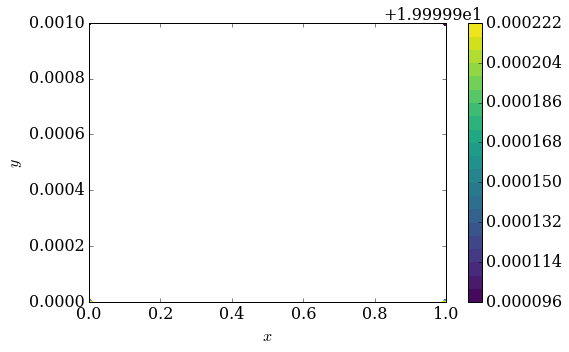

In [37]:
plt.figure(figsize=(8,5))
plt.contourf(x,y,T,20,cmap=cm.viridis)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();


In [38]:
print(T)

[[ 20.00012093  20.00012093  20.00012093 ...,  20.00012093  20.00012093
   20.00012093]
 [ 20.                  nan          nan ...,          nan          nan
   20.        ]
 [ 20.                  nan          nan ...,          nan          nan
   20.        ]
 ..., 
 [ 20.                  nan          nan ...,          nan          nan
   20.        ]
 [ 20.                  nan          nan ...,          nan          nan
   20.        ]
 [ 20.          20.          20.         ...,  20.          20.          20.        ]]
